# Поиск оптимальных внешних параметров модели по графику

Подберем параметр  `alpha` для модели линейной регрессии с L1-регуляризацией.

In [14]:
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
# возьмем данные о домах в Калифорнии
from sklearn.datasets import fetch_california_housing
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

from warnings import simplefilter
simplefilter('ignore')

Получим данные о домах в калифорнии и подготовим их для передачи в модель.

In [15]:
data = fetch_california_housing(as_frame=True)

housing_data = data['frame']
housing_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [16]:
# признаки
X = housing_data.drop(['MedHouseVal'], axis=1)
# целевой признак
y = housing_data['MedHouseVal']

# разделяем на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# нормализуем данные, чтобы коэффициенты не были слишком большими, так модель будет устойчивой

# инициализируем нормализатор MinMaxScaler
mm_scaler = preprocessing.MinMaxScaler()

# производим стандартизацию
mm_scaler.fit(X_train)

X_train_scaled = mm_scaler.transform(X_train)
X_test_scaled = mm_scaler.transform(X_test)

In [17]:
# cоздаём генератор полиномиальных признаков
polynomial_features_generator3 = preprocessing.PolynomialFeatures(degree=3, include_bias=False)
# обучаем его
polynomial_features_generator3.fit(X_train_scaled)

# генерируем полиномиальные признаки для тренировочной выборки
X_train_poly3 = polynomial_features_generator3.transform(X_train_scaled)

# генерируем полиномиальные признаки для тестовой выборки
X_test_poly3 = polynomial_features_generator3.transform(X_test_scaled)

In [18]:
# Создаём список значений alpha
alpha_list = np.linspace(0.00001, 0.001, 20)

# Создаём пустые списки, в которые будем добавлять результаты 
train_scores = []
test_scores = []

for alpha in alpha_list:
    # Создаём объект класса линейной регрессии с L1-регуляризацией
    lasso_poly3_model = linear_model.Lasso(alpha=alpha, max_iter=10000)
    
    # Обучаем модель
    lasso_poly3_model.fit(X_train_poly3, y_train)
    
    # Делаем предсказание для тренировочной выборки
    y_train_pred_poly3 = lasso_poly3_model.predict(X_train_poly3)
    
    # Делаем предсказание для тестовой выборки
    y_test_pred_poly3 = lasso_poly3_model.predict(X_test_poly3)
    
    # посчитаем MAPE для тренировочной выборки
    mape_train3 = metrics.mean_absolute_percentage_error(y_train, y_train_pred_poly3)
    # посчитаем MAPE для тренировочной выборки
    mape_test3 = metrics.mean_absolute_percentage_error(y_test, y_test_pred_poly3)

    # добавляем метрики в списки
    train_scores.append(mape_train3)
    test_scores.append(mape_test3)

Построим график с иллюстрацией, как меняются метрики в зависимости от `alpha`.

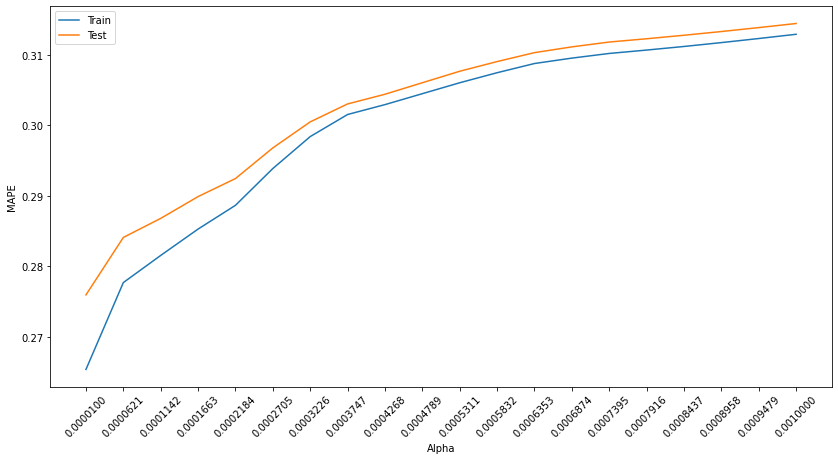

In [19]:
# фигура + координатная плоскость
fig, ax = plt.subplots(figsize=(14, 7)) 

# линейный график для тренировочной выборки
ax.plot(alpha_list, train_scores, label='Train') 

# линейный график для тестовой выборки
ax.plot(alpha_list, test_scores, label='Test') 

# название оси абсцисс
ax.set_xlabel('Alpha') 

# название оси ординат
ax.set_ylabel('MAPE') 

# метки по оси абсцисс
ax.set_xticks(alpha_list) 

# поворот меток на оси абсцисс
ax.xaxis.set_tick_params(rotation=45) 

# отображение легенды
ax.legend(); 

По графику видно, что при `alpha` равном `0.0003747` метрики на тренировочной и тестовой выборке наиболее близкие.\
Дальше расстояние между кривыми примерно одинаково, но `MAPE` повышается.\
Возмем значение `alpha` равным `0.0003747`.

In [20]:
# Создаём объект класса линейной регрессии с L1-регуляризацией
lasso_poly3_model = linear_model.Lasso(alpha=0.0003747, max_iter=10000)

# Обучаем модель
lasso_poly3_model.fit(X_train_poly3, y_train)

# Делаем предсказание для тренировочной выборки
y_train_pred_poly3 = lasso_poly3_model.predict(X_train_poly3)

# Делаем предсказание для тестовой выборки
y_test_pred_poly3 = lasso_poly3_model.predict(X_test_poly3)

# посчитаем MAPE для тренировочной выборки
mape_train3 = metrics.mean_absolute_percentage_error(y_train, y_train_pred_poly3)
# посчитаем MAPE для тренировочной выборки
mape_test3 = metrics.mean_absolute_percentage_error(y_test, y_test_pred_poly3)

print('MAPE train:', mape_train3)
print('MAPE test:', mape_test3)

MAPE train: 0.3015568205708649
MAPE test: 0.303058523319282


Таким образом мы добились почти одинакового значения метрик на тренировочной и тестовой выборке.